In [31]:
# imports
import requests
import pandas as pd
import numpy as np
import json
import os
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
# Reading bike stations csv to dataframe
df_stations = pd.read_csv('df_stations.csv')[['id','name','total_bikes','latitude','longitude']]

# Reading bars and restaurants csv's to dataframes
df_restaurants_bars_fs = pd.read_csv('df_restaurants_bars_fs.csv')
df_bars_yelp = pd.read_csv('df_bars_yelp.csv')

In [18]:
# Check column names
print(df_stations.columns)
print(df_restaurants_bars_fs.columns)
print(df_bars_yelp.columns)

Index(['id', 'name', 'total_bikes', 'latitude', 'longitude'], dtype='object')
Index(['station_id', 'fsq_id', 'name', 'popularity', 'price', 'rating'], dtype='object')
Index(['station_id', 'id', 'name', 'review_count', 'rating', 'price2'], dtype='object')


In [19]:
# Need to adjust column names before merging
df_stations.columns = ['station_id','station_name','total_bikes', 'latitude', 'longitude']
df_restaurants_bars_fs.columns = ['station_id', 'fsq_id', 'fsq_name', 'fsq_popularity', 'fsq_price', 'fsq_rating']
df_bars_yelp.columns = ['station_id', 'yelp_id', 'yelp_name', 'yelp_review_count', 'yelp_rating', 'yelp_price']

# Join the data from Part 1 with the data from Part 2 to create a new dataframe.

### FourSquare

In [21]:
# Merge dataframes together on the 'station_id' column
df_restaurants_bars_fs_merged = df_stations.merge(df_restaurants_bars_fs,how='left',on='station_id')
df_restaurants_bars_fs_merged.head()

In [85]:
# There are duplicate bike stations and POI's in the merged tables, but each station to POI matchup is unique.  
# To find the average of each metric for every bike station, I created a pivot table.

# Creating a pivot table to aggregate by bike station
pivot_fs = df_restaurants_bars_fs_merged.pivot_table(index=['station_id','station_name'],
                          values=['fsq_popularity','fsq_price','fsq_rating','total_bikes'],
                          aggfunc=['mean','count'])

pivot_fs.columns = ['mean_fsq_POI_popularity','mean_fsq_POI_price','mean_fsq_POI_rating','total_bikes',
                    'count_fsq_popularity','count_fsq_price','count_fsq_rating','count_fsq_POIs']

pivot_fs = pivot_fs[['total_bikes','mean_fsq_POI_popularity','mean_fsq_POI_price','mean_fsq_POI_rating','count_fsq_POIs']]
pivot_fs.head()

,,total_bikes,mean_fsq_POI_popularity,mean_fsq_POI_price,mean_fsq_POI_rating,count_fsq_POIs
station_id,station_name,,,,,
03712bfd188583696010813718ea01e1,P155 Colter St / Central Ave,12,0.954243,1.636364,8.050000,26
07a67f4f4e097e3e5b85fd2bf6ab0809,P175 9th St. / Van Buren St,13,0.958142,1.750000,8.175000,4
07aa8e1d89b85fdf5e0fba51043ba0ed,P101 5th St / Grant St,10,0.716138,1.333333,6.700000,11
0cab138d1a9b55f141311a4a90e96d28,P168 5th St. and Washington,15,0.913278,1.892857,7.488235,37
0d985cfd2b567116f790a1a7e31d5ad7,T09 Washington St / Center Pkwy,9,0.994972,NaN,7.300000,2


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<Axes: xlabel='count_fsq_POIs', ylabel='total_bikes'>

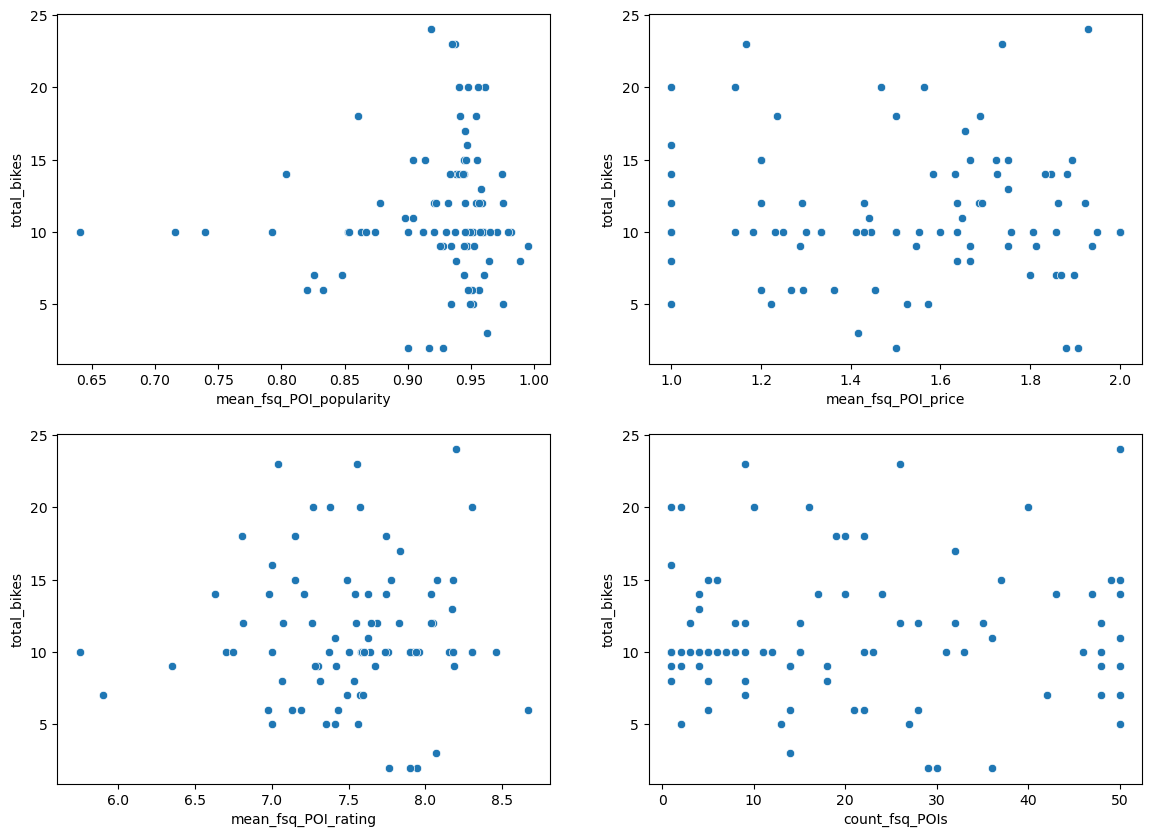

In [86]:
# EDA for the CityBike-Foursquare merged table to see if a relationship between total_bikes and other metrics can be visualized
# There doesn't seem to be any relationship, but this will be explored further in the model_building notebook

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(ax=axes[0,0], data=pivot_fs,x='mean_fsq_POI_popularity',y='total_bikes')
sns.scatterplot(ax=axes[0,1], data=pivot_fs,x='mean_fsq_POI_price',y='total_bikes')
sns.scatterplot(ax=axes[1,0], data=pivot_fs,x='mean_fsq_POI_rating',y='total_bikes')
sns.scatterplot(ax=axes[1,1], data=pivot_fs,x='count_fsq_POIs',y='total_bikes')

## Yelp

In [87]:
# Merge dataframes together on the 'station_id' column
df_bars_yelp_merged = df_stations.merge(df_bars_yelp,how='left',on='station_id')
df_bars_yelp_merged.head()

,station_id,station_name,total_bikes,latitude,longitude,yelp_id,yelp_name,yelp_review_count,yelp_rating,yelp_price
0,d334f65221f6a681f8b03433f36e2075,T19 Kiwanis Park,9,33.366488,-111.935612,5Ks4F3IOvSLi0KePlhr-sw,Bogeys Grill,147.0,4.0,1.0
1,cac663c57dee1dafd5f152bb906e97d5,P211 10th St / Pierce,6,33.455654,-112.060592,5V8O-vas5A4XGWqxsJ7GBg,The Farish House,286.0,4.5,2.0
2,cac663c57dee1dafd5f152bb906e97d5,P211 10th St / Pierce,6,33.455654,-112.060592,snnblypVofvG3OKMUKWO6A,IL Bosco Pizza,160.0,4.5,2.0
3,cac663c57dee1dafd5f152bb906e97d5,P211 10th St / Pierce,6,33.455654,-112.060592,QEBJq71ph_qtmQyCPNrwPw,Palma,324.0,4.0,2.0
4,cac663c57dee1dafd5f152bb906e97d5,P211 10th St / Pierce,6,33.455654,-112.060592,aEtbXqbkf2BnwEVWQ2yjUw,Taco Chelo,712.0,4.0,2.0


In [88]:
# There are duplicate bike stations and Yelp POI's in the merged tables, but each station to POI matchup is unique.  
# To find the average of each metric for every bike station, I created a pivot table.

# Creating a pivot table to aggregate by bike station
pivot_yelp = df_bars_yelp_merged.pivot_table(index=['station_id','station_name'],
                          values=['yelp_review_count','yelp_rating','yelp_price','total_bikes'],
                          aggfunc=['mean','count'])

pivot_yelp.columns = ['total_bikes','mean_yelp_price','mean_yelp_rating','mean_yelp_review_count',
                      'count_yelp_POIs','count_yelp_price','count_yelp_rating','count_yelp_review_count']

pivot_yelp = pivot_yelp[['total_bikes','mean_yelp_price','mean_yelp_rating','mean_yelp_review_count','count_yelp_POIs']]
pivot_yelp.head()

,,total_bikes,mean_yelp_price,mean_yelp_rating,mean_yelp_review_count,count_yelp_POIs
station_id,station_name,,,,,
03712bfd188583696010813718ea01e1,P155 Colter St / Central Ave,12,1.875000,3.913793,492.551724,29
07a67f4f4e097e3e5b85fd2bf6ab0809,P175 9th St. / Van Buren St,13,2.000000,4.030000,234.920000,50
07aa8e1d89b85fdf5e0fba51043ba0ed,P101 5th St / Grant St,10,2.151515,3.825581,315.674419,43
0cab138d1a9b55f141311a4a90e96d28,P168 5th St. and Washington,15,2.065217,4.000000,384.180000,50
0d985cfd2b567116f790a1a7e31d5ad7,T09 Washington St / Center Pkwy,9,2.000000,4.000000,100.400000,5


<Axes: xlabel='count_yelp_POIs', ylabel='total_bikes'>

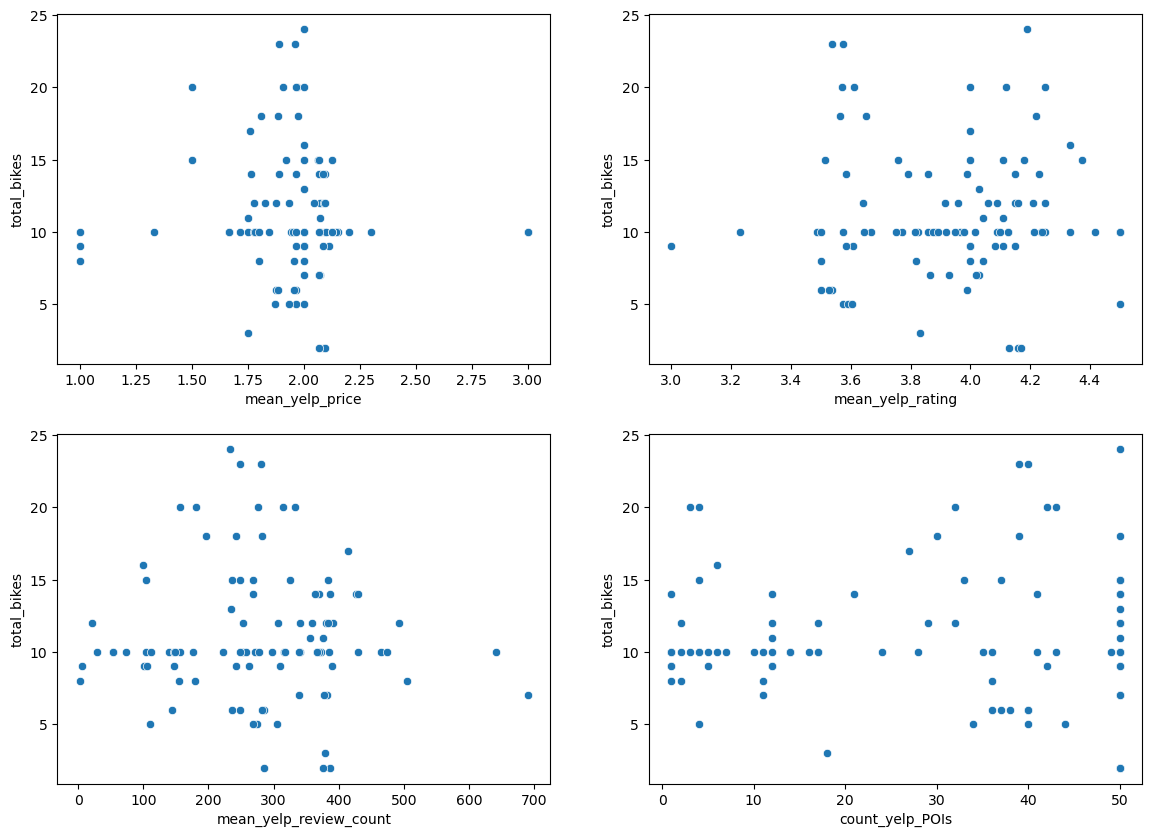

In [89]:
# EDA for the CityBike-Yelp merged table to see if a relationship between total_bikes and other metrics can be visualized
# There doesn't seem to be any relationship, but this will be explored further in the model_building notebook

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(ax=axes[0,0], data=pivot_yelp,x='mean_yelp_price',y='total_bikes')
sns.scatterplot(ax=axes[0,1], data=pivot_yelp,x='mean_yelp_rating',y='total_bikes')
sns.scatterplot(ax=axes[1,0], data=pivot_yelp,x='mean_yelp_review_count',y='total_bikes')
sns.scatterplot(ax=axes[1,1], data=pivot_yelp,x='count_yelp_POIs',y='total_bikes')

In [90]:
# Writing pivot tables to csv
pivot_fs.to_csv(path_or_buf='pivot_fs.csv')
pivot_yelp.to_csv(path_or_buf='pivot_yelp.csv')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [105]:
# Concatecating pivot_fs and pivot_yelp tables
df_stations = pd.concat([pivot_fs,pivot_yelp.drop(labels='total_bikes',axis=1)],axis=1).reset_index(drop=False)
df_stations.head()

,station_id,station_name,total_bikes,mean_fsq_POI_popularity,mean_fsq_POI_price,mean_fsq_POI_rating,count_fsq_POIs,mean_yelp_price,mean_yelp_rating,mean_yelp_review_count,count_yelp_POIs
0,03712bfd188583696010813718ea01e1,P155 Colter St / Central Ave,12,0.954243,1.636364,8.050000,26,1.875000,3.913793,492.551724,29
1,07a67f4f4e097e3e5b85fd2bf6ab0809,P175 9th St. / Van Buren St,13,0.958142,1.750000,8.175000,4,2.000000,4.030000,234.920000,50
2,07aa8e1d89b85fdf5e0fba51043ba0ed,P101 5th St / Grant St,10,0.716138,1.333333,6.700000,11,2.151515,3.825581,315.674419,43
3,0cab138d1a9b55f141311a4a90e96d28,P168 5th St. and Washington,15,0.913278,1.892857,7.488235,37,2.065217,4.000000,384.180000,50
4,0d985cfd2b567116f790a1a7e31d5ad7,T09 Washington St / Center Pkwy,9,0.994972,NaN,7.300000,2,2.000000,4.000000,100.400000,5


In [116]:
# Defining function to connect to a SQLite database

import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [117]:
# Creating connection
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [118]:
# Create function to execute query that writes the concatenated dataframe to the SQLite database

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [124]:
# Creating query string

create_table = """
CREATE TABLE IF NOT EXISTS stations (
  station_id TEXT NOT NULL,
  station_name TEXT,
  total_bikes INTEGER,
  mean_fsq_POI_popularity FLOAT,
  mean_fsq_POI_price FLOAT,
  mean_fsq_POI_rating FLOAT,
  count_fsq_POIs INTEGER,
  mean_yelp_price FLOAT,
  mean_yelp_rating FLOAT,
  mean_yelp_review_count FLOAT,
  count_yelp_POIs FLOAT
);
"""

In [125]:
# Create table in database
execute_query(connection, create_table)

Query executed successfully


In [126]:
# Inserting df_stations as records into 'stations' table
df_stations.to_sql('stations',connection,if_exists='replace',index=False)

98